 some one told me today that winter in australia are in different months than expected.
 June to aug which is strange.
 it got me curious. 
 i Should be able to explain that using visual analytics. so here goes what i did.

In [655]:
# Import packages
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly, Daily

In [656]:
country = pd.read_csv(r'https://gist.githubusercontent.com/ofou/df09a6834a8421b4f376c875194915c9/raw/355eb56e164ddc3cd1a9467c524422cb674e71a9/country-capital-lat-long-population.csv')
country

,Country,Capital City,Latitude,Longitude,Population,Capital Type
0,Afghanistan,Kabul,34.5289,69.1725,4011770,Capital
1,Albania,Tiranë (Tirana),41.3275,19.8189,475577,Capital
2,Algeria,El Djazaïr (Algiers),36.7525,3.0420,2693542,Capital
3,American Samoa,Pago Pago,-14.2781,-170.7025,48526,Capital
4,Andorra,Andorra la Vella,42.5078,1.5211,22614,Capital
...,...,...,...,...,...,...
229,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,1025,Capital
230,Western Sahara,El Aaiún,27.1532,-13.2014,232388,Capital
231,Yemen,Sana'a',15.3531,44.2078,2779317,Capital
232,Zambia,Lusaka,-15.4134,28.2771,2523844,Capital


In [657]:
country['point'] = country.apply(lambda row: Point(row['Latitude'], row['Longitude']), axis=1)

In [658]:
# Set time period
start = datetime(2022,12,20)
end = datetime(2023,12,19)

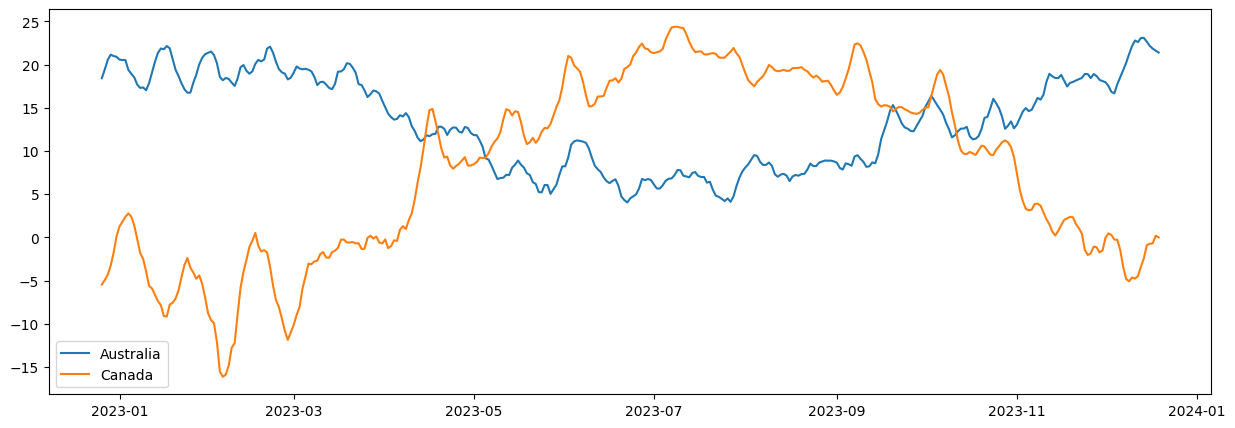

In [659]:
# Create Point for Australia
tpr = country[country['Country'] == 'Australia']['point'].iloc[0]
# Get data
data = Daily(tpr, start, end)
data = data.fetch()
# moving average of temperature
data = data['tavg']
data = data.rolling(7).mean()
data = data.to_frame()

# Create Point for Canada
tpr2 = country[country['Country'] == 'Canada']['point'].iloc[0]
# Get data
data2 = Daily(tpr2, start, end)
data2 = data2.fetch()
# moving average of temperature
data2 = data2['tavg']
data2 = data2.rolling(7).mean()
data2 = data2.to_frame()

# Plot data
plt.figure(figsize=(15, 5))
plt.plot(data, label='Australia')
plt.plot(data2, label='Canada')
plt.legend()
plt.show()


# now i believe it ! 
#### we have different summers and winters. Strange !

In [660]:
# finding eaqually spaced cities around the global average
# country.sort_values(by=['Latitude', 'Longitude'], inplace=True)
country.reset_index(drop=True, inplace=True)
# country = country[country.index % 2 == 0]
cities = country[['Capital City', 'Latitude', 'Longitude']]
cities.columns = ['City', 'Latitude', 'Longitude']
cities.reset_index(drop=True, inplace=True)
cities.head()

,City,Latitude,Longitude
0,Kabul,34.5289,69.1725
1,Tiranë (Tirana),41.3275,19.8189
2,El Djazaïr (Algiers),36.7525,3.0420
3,Pago Pago,-14.2781,-170.7025
4,Andorra la Vella,42.5078,1.5211


In [661]:
dataframes = data.copy()

In [662]:
dataframes.drop(columns=['tavg'], inplace=True)
dataframes

""
time
2022-12-20
2022-12-21
2022-12-22
2022-12-23
2022-12-24
...
2023-12-15
2023-12-16
2023-12-17


In [663]:
#  Iterate through cities and fetch data
for index, row in cities.iterrows():
    data = Daily(Point(row['Latitude'], row['Longitude']), start=start, end=end).fetch()
    
    # Filter and rename columns
    data = data[['tavg']].rename(columns={'tavg': row['City']})
    data = data.rolling(15).mean()
    
    # Append data to the list of DataFrames
    dataframes = pd.concat([dataframes, data], axis=1)

dataframes.head(15)


,Kabul,Tiranë (Tirana),El Djazaïr (Algiers),Pago Pago,Andorra la Vella,Luanda,The Valley,St. John's,Buenos Aires,Yerevan,...,Montevideo,Tashkent,Port Vila,Caracas,Hà Noi,Matu-Utu,El Aaiún,Sana'a',Lusaka,Harare
2022-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [664]:
# dropping the first null rows 
dataframes = dataframes.iloc[14:]


# droppping empty columns
dataframes.dropna(axis=1, inplace=True)
dataframes.head()

,Kabul,Tiranë (Tirana),El Djazaïr (Algiers),Pago Pago,Luanda,The Valley,St. John's,Buenos Aires,Yerevan,Oranjestad,...,Charlotte Amalie,Montevideo,Tashkent,Port Vila,Caracas,Hà Noi,Matu-Utu,Sana'a',Lusaka,Harare
2023-01-03 00:00:00,-1.400000,11.173333,14.706667,28.206667,27.000000,26.193333,26.426667,23.766667,-1.806667,26.860000,...,26.073333,22.020000,2.446667,26.980000,20.980000,17.313333,28.153333,13.820000,24.546667,20.753333
2023-01-04 00:00:00,-1.680000,11.286667,14.566667,28.073333,27.053333,26.180000,26.380000,23.713333,-1.980000,26.806667,...,25.986667,21.940000,2.586667,26.900000,20.933333,17.380000,28.060000,13.973333,24.593333,20.880000
2023-01-05 00:00:00,-1.833333,11.360000,14.373333,27.920000,27.066667,26.126667,26.300000,23.700000,-2.160000,26.766667,...,25.953333,21.886667,3.000000,26.793333,20.893333,17.473333,27.893333,14.093333,24.633333,20.960000
2023-01-06 00:00:00,-1.853333,11.466667,14.100000,27.713333,27.140000,26.086667,26.246667,23.766667,-2.240000,26.726667,...,25.900000,21.953333,3.513333,26.653333,20.880000,17.473333,27.760000,14.180000,24.760000,21.140000
2023-01-07 00:00:00,-1.726667,11.446667,13.806667,27.640000,27.200000,26.013333,26.193333,23.900000,-2.173333,26.673333,...,25.846667,22.046667,4.180000,26.693333,20.853333,17.373333,27.700000,14.206667,24.806667,21.013333


In [665]:
dataframes = dataframes.T


In [666]:
from sklearn.preprocessing import StandardScaler
# Data normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframes)

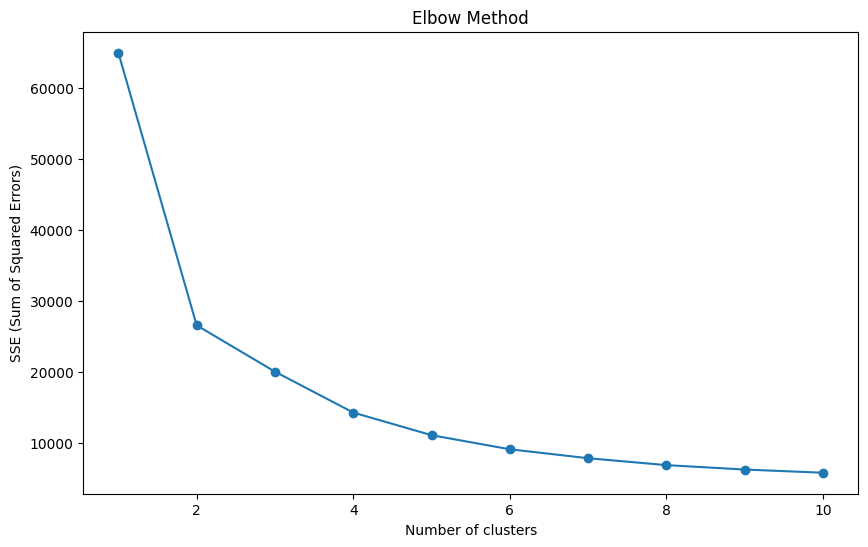

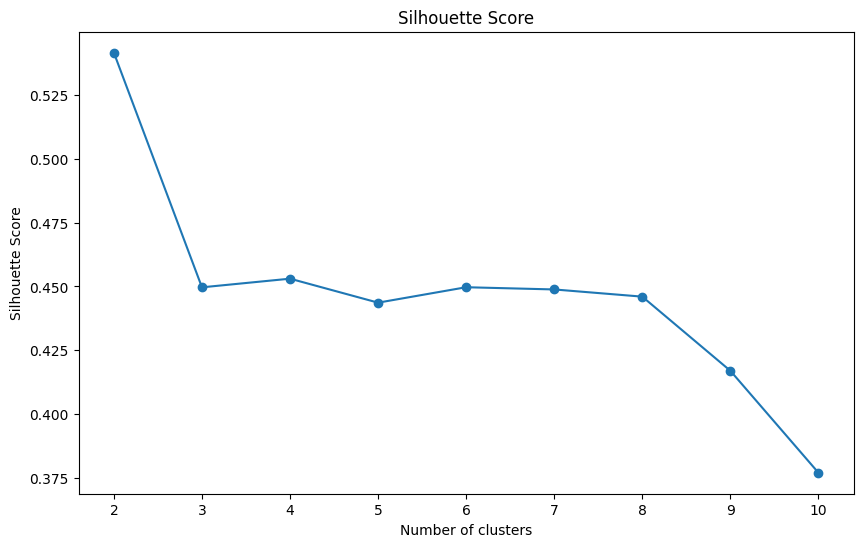

In [667]:

# Elbow Method
sse = []
for k in range(1, 11):  # Test different numbers of clusters (1 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [668]:
from sklearn.cluster import KMeans
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [669]:
# Assign clusters to each data point
dataframes['Cluster'] = kmeans.labels_
dataframes.head()

,2023-01-03 00:00:00,2023-01-04 00:00:00,2023-01-05 00:00:00,2023-01-06 00:00:00,2023-01-07 00:00:00,2023-01-08 00:00:00,2023-01-09 00:00:00,2023-01-10 00:00:00,2023-01-11 00:00:00,2023-01-12 00:00:00,...,2023-12-11 00:00:00,2023-12-12 00:00:00,2023-12-13 00:00:00,2023-12-14 00:00:00,2023-12-15 00:00:00,2023-12-16 00:00:00,2023-12-17 00:00:00,2023-12-18 00:00:00,2023-12-19 00:00:00,Cluster
Kabul,-1.400000,-1.680000,-1.833333,-1.853333,-1.726667,-1.553333,-1.380000,-1.360000,-1.313333,-1.566667,...,2.373333,2.020000,1.673333,1.293333,0.866667,0.613333,0.300000,-0.040000,-0.300000,2
Tiranë (Tirana),11.173333,11.286667,11.360000,11.466667,11.446667,11.426667,11.440000,11.293333,11.000000,10.646667,...,10.353333,10.693333,10.913333,11.126667,10.973333,10.366667,9.606667,9.313333,9.360000,2
El Djazaïr (Algiers),14.706667,14.566667,14.373333,14.100000,13.806667,13.626667,13.800000,13.686667,13.633333,13.606667,...,14.426667,14.706667,14.766667,14.653333,14.466667,14.153333,13.880000,13.786667,13.813333,2
Pago Pago,28.206667,28.073333,27.920000,27.713333,27.640000,27.540000,27.520000,27.513333,27.546667,27.433333,...,28.753333,28.673333,28.626667,28.413333,28.333333,28.193333,28.173333,28.126667,28.126667,1
Luanda,27.000000,27.053333,27.066667,27.140000,27.200000,27.173333,27.093333,27.126667,27.093333,27.033333,...,27.120000,27.100000,27.340000,27.520000,27.620000,27.720000,27.753333,27.680000,27.686667,0


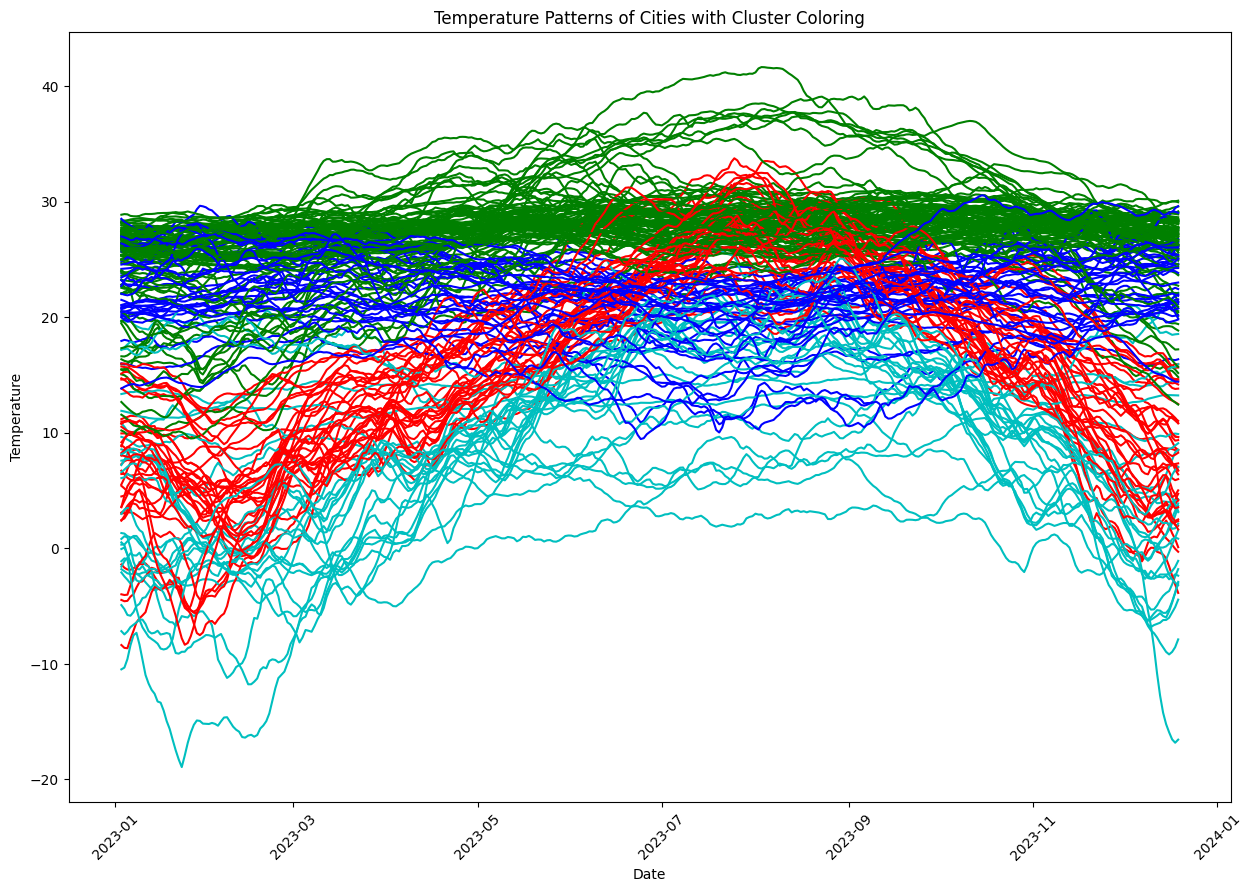

In [670]:
df = dataframes.drop(columns=['Cluster'])
dataframes.sort_values(by='Cluster', inplace=True)
clusters = dataframes['Cluster']
# Plotting
plt.figure(figsize=(15, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']  # Colors for each cluster 

for city in df.index:
    cluster = clusters[city]
    plt.plot(df.columns, df.loc[city], label=city, color=colors[cluster])

plt.title('Temperature Patterns of Cities with Cluster Coloring')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

The blue and red lines look complimentory . while light blue nad red are similar. 
Green tend to have more normal temp and some of which look similar to red. 

In [671]:
from sklearn.metrics import silhouette_score
print(silhouette_score(scaled_data, kmeans.labels_))

0.453031350618137


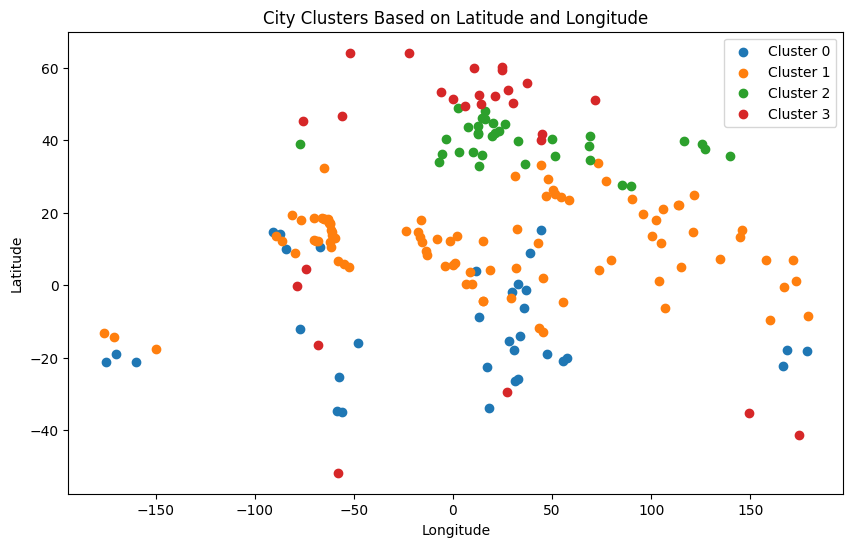

In [672]:
df = dataframes['Cluster']
df = df.to_frame()
df.reset_index(inplace=True)
df.columns = ['city', 'Cluster']

df['Latitude'] = df['city'].map(cities.set_index('City')['Latitude'])
df['Longitude'] = df['city'].map(cities.set_index('City')['Longitude'])

df['Cluster'] = df['Cluster'].astype('category')

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in df['Cluster'].cat.categories:
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')

plt.title('City Clusters Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [673]:
!pip install folium



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [674]:
import folium

# Convert cluster labels to integers
df['Cluster'] = df['Cluster'].astype(int)

# Create a base map
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# Colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Adding markers to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=colors[row['Cluster'] % len(colors)],  
        fill=True,
        fill_color=colors[row['Cluster'] % len(colors)],  
        fill_opacity=0.7,
        popup=row['city']
    ).add_to(map)

# Display 
map


the patterns seems to have more related to lattitude for season. 

validating with interent research : 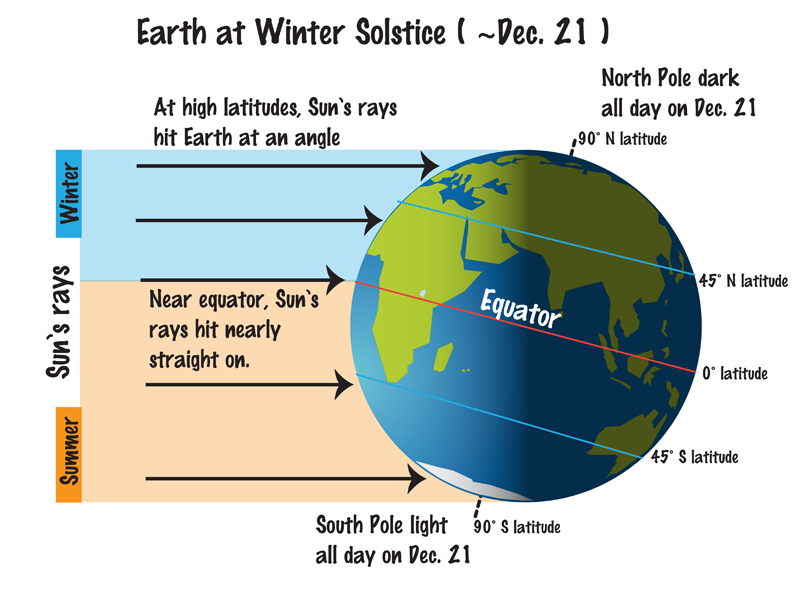